In [1]:
import sys
import os
import SimpleITK
import numpy
import matplotlib.pyplot
sys.path.append(os.path.join(os.path.expanduser('~'),'software','src','nixSuite','wrapper'))
import nixWrapper
nixWrapper.loadLibrary('labkeyInterface')
import labkeyInterface
net=labkeyInterface.labkeyInterface()
fconfig=os.path.join(os.path.expanduser('~'),'.labkey','network.json')
net.init(fconfig)
net.getCSRF()
import labkeyFileBrowser
sys.path.append(os.getcwd())
import downloadPatient
fb=labkeyFileBrowser.labkeyFileBrowser(net)
project='dinamic_spect/Patients'
locDir=os.path.join(os.path.expanduser('~'),'temp','dynamicSPECT')
import labkeyDatabaseBrowser
db=labkeyDatabaseBrowser.labkeyDB(net)
ds=db.selectRows(project,'study','ImagingData',[])
patients=list(set([row['PatientId'] for row in ds['rows']]))


/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


User: andrej studen CSRF: 1a03f123c4c0ef7fdc5740ce155aaf0e


In [3]:
#make polar plot
def drawPolar(regionContent,scale):
    cmap=matplotlib.pyplot.cm.viridis
    #cmap=matplotlib.pyplot.cm.inferno
    #cmap=matplotlib.pyplot.cm.magma
    #cmap=matplotlib.pyplot.cm.plasma
    #cmap=matplotlib.pyplot.cm.Reds
    
    N=4
    r0=8
    theta = numpy.linspace(0.0, 2 * numpy.pi, N, endpoint=False)
    width = (2*numpy.pi) / N
    radii = r0*numpy.ones(theta.size)
    theta1 = numpy.linspace(0.0, 2 * numpy.pi, 1, endpoint=False)
    width1 = (2*numpy.pi) / 1
    radii1 = r0*numpy.ones(theta1.size)
    ax = matplotlib.pyplot.subplot(111, polar=True)
    barsOuter = ax.bar(theta, radii, width=width, bottom=2*r0)
    barsInner = ax.bar(theta, radii, width=width, bottom=1*r0)
    barsCenter = ax.bar(theta1, radii1, width=width1, bottom=0*r0)
    for (r,b) in zip(regionContent[0:4],barsOuter):
        b.set_facecolor(cmap(r*scale))
    for (r,b) in zip(regionContent[4:8],barsInner):
        b.set_facecolor(cmap(r*scale))
    for (r,b) in zip(regionContent[8:9],barsCenter):
        b.set_facecolor(cmap(r*scale))
    ax.get_yaxis().set_visible(False)
    return ax

User: andrej studen CSRF: 71974729a92d902434d7ddea345c421b


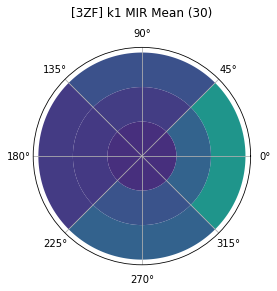

User: andrej studen CSRF: c0d2c8d37846c63d731e8350b7b4a022


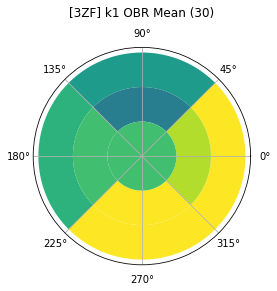

User: andrej studen CSRF: 29e37e3b41751fc987b41df08b0e771b


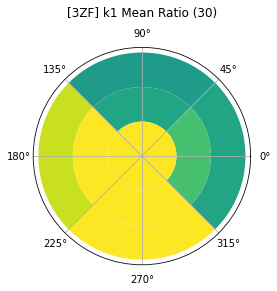

In [46]:
patients1=[patients[5]]
statVar='Mean'
var='k1'
vscale=2*60
nclass=30
classId={'variable':'nclass','value':str(nclass),'oper':'eq'}
ds=db.selectRows(project,'study','ImagingData',[classId])
rows=ds['rows']
for p in patients1:
    oDir=os.path.join(locDir,p)
    oDirRemote=fb.buildPathURL(project,[p]);
    if not os.path.isdir(oDir):
        os.makedirs(oDir)
        
    rows=[row for row in ds['rows'] if row['PatientId']==p]
    
    scale=vscale
        
    regionContent=[row[var+'MIR'+statVar] for row in rows]
    if var=='v19':
        scale=1/numpy.max(regionContent)
    ax=drawPolar(regionContent,scale)
    ax.set_title('[{}] {} MIR {} ({})'.format(p,var,statVar,nclass),pad=20)
    fname='{}MIR_{}_{}{}.png'.format(p,nclass,var,statVar)
    matplotlib.pyplot.savefig(os.path.join(oDir,fname))
    fb.writeFileToFile(os.path.join(oDir,fname),oDirRemote+'/'+fname)
    matplotlib.pyplot.show()
    
    regionContent=[row[var+'OBR'+statVar] for row in rows]
    if var=='v19':
        scale=1/numpy.max(regionContent)
    ax1=drawPolar(regionContent,scale)
    ax1.set_title('[{}] {} OBR {} ({})'.format(p,var,statVar,nclass),pad=20)
    fname='{}OBR_{}_{}{}.png'.format(p,nclass,var,statVar)
    matplotlib.pyplot.savefig(os.path.join(oDir,fname))
    fb.writeFileToFile(os.path.join(oDir,fname),oDirRemote+'/'+fname)
    matplotlib.pyplot.show()
    
    if var!='k1':
        continue
    regionContent=[row[var+'OBR'+statVar]/row[var+'MIR'+statVar] for row in rows]
    #regionContent=[row['k1Ratio'+statVar] for row in rows]
    
    ax1=drawPolar(regionContent,0.25)
    ax1.set_title('[{}] k1 {} Ratio ({})'.format(p, statVar,nclass),pad=20)
    fname='{}_{}_k1Ratio{}.png'.format(p,nclass,statVar)
    matplotlib.pyplot.savefig(os.path.join(oDir,fname))
    fb.writeFileToFile(os.path.join(oDir,fname),oDirRemote+'/'+fname)
    matplotlib.pyplot.show()
    
    

In [28]:
pairs={}
for p in patients:
    idFilter={'variable':'PatientId','value':p,'oper':'eq'}
    ds=db.selectRows(project,'study','Imaging',[idFilter])
    pairs[p]=[r['aliasID'] for r in ds['rows']]
print(pairs)
    

{'7TM': ['7TMMIR', '7TMOBR'], '10KF': ['10KFMIR', '10KFOBR'], '5MI': ['5MIMIR', '5MIOBR'], '3ZF': ['3ZFMIR', '3ZFOBR'], '11ZM': ['11ZMMIR', '11ZMOBR'], '2SB': ['2SBMIR', '2SMobr']}


/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


{'7TM': ['7TMMIR', '7TMOBR'], '10KF': ['10KFMIR', '10KFOBR'], '5MI': ['5MIMIR', '5MIOBR'], '3ZF': ['3ZFMIR', '3ZFOBR'], '11ZM': ['11ZMMIR', '11ZMOBR'], '2SB': ['2SBMIR', '2SMobr']}


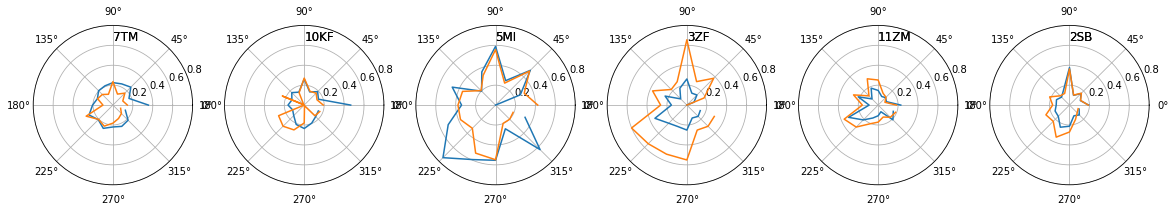

In [44]:
pairs={}
for p in patients:
    idFilter={'variable':'PatientId','value':p,'oper':'eq'}
    ds=db.selectRows(project,'study','Imaging',[idFilter])
    pairs[p]=[r['aliasID'] for r in ds['rows']]
print(pairs)
    
s2=1.0
fig, ax = matplotlib.pyplot.subplots(1,6,figsize=(20,10),subplot_kw={'projection': 'polar'})
i=0    
for pt in pairs:
    for p in pairs[pt]:
        idFilter={'variable':'aliasID','value':p,'oper':'eq'}
        sigmaFilter={'variable':'sigma2','value':str(s2),'oper':'eq'}
        typeFilter={'variable':'option','value':'D','oper':'eq'}
        ds=db.selectRows(project,'study','Summary',[idFilter,sigmaFilter,typeFilter])
        nr=len(ds['rows'])
        k1=numpy.zeros(nr)
        for r in ds['rows']:
            k1[int(r['regionId'])]=60*r['mean']
        if k1[0]>0.8:
            k1[0]=0
        theta1 = numpy.linspace(0.0, 2 * numpy.pi, nr, endpoint=False)
        ax[i].plot(theta1,k1)
        ax[i].set_rmax(0.8)
        ax[i].text(0.5*numpy.pi,0.65,pt,fontsize='large')
        #print(k1)
    i+=1
matplotlib.pyplot.show()

    